# Numerical Analysis
###### Rafael Barsotti

#### 1a) Implemente os métodos explícito e implícito dados em sala para resolver a equação do calor da página 585 com diferentes valores de h e k. Em particular teste, h = 0.1 = k, h = 0.01 = k e (h = 0.1,k = 0.001). Compare os resultados obtidos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

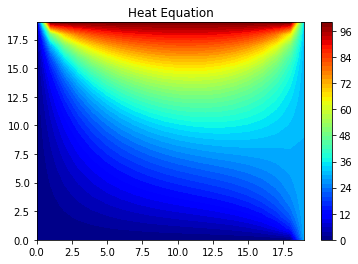

In [2]:
# Diferenças Finitas - Equação do Calor

def heat_equation(h,k,n,m):
    u0 = np.zeros((1,n))
    v0 = np.zeros((1,n))
    for i in range(n-1):
        u[0,i] = m.sin(m.pi * i * h)
    for j in range(m):
        for i in range(n-1):
            v0[0,i] = 1/2 * (u[0,i-1] + u[0,i+1]) 
        t = j * k
        for i in range(n):
            u[0,i] = m.e**(- m.pi**2 * 7 ) * sin(m.pi * i * h) - v0[0,i]
        for i in range(n-1):
            u0[0,i] = v0[0,i]
            
def plot_heat():
    lenu = lenv = n,m 
    colorinterpolation = 50
    colourMap = plt.cm.jet
    u, v = np.meshgrid(np.arange(0, lenu), np.arange(0, lenv))
    T[(lenv-1):, :] = Ttop
    T[:1, :] = Tbottom
    T[:, (m):] = Tright
    T[:, :1] = Tleft
    for iteration in range(n):
        for i in range(1, m):
            for j in range(1, lenv-1, delta):
                T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
    plt.title("Heat Equation")
    plt.contourf(u0, v0, T, colorinterpolation, cmap=colourMap)
    plt.colorbar()
    plt.show()

#### 4) Considere a equação do transporte definida na página 601 do livro texto do Cheney e Kincaid. Suponha que c(x, t) = 1 para todo (x, t) com x, t ∈ [0 3]. Implemente o método das diferenças finitas proposto na mesma página com diferentes valores de h e k (h = 0.1, h = 0.01 etc.) para obter soluções para u e verificar que de fato o método é instável.

In [39]:
# Diferenças Finitas - Equação do Transporte
# Utilizando Mesmas Condições de Contorno da Equação do Calor

def advection_equation(h,k,n,m):
    u0 = np.zeros((1,n))
    v0 = np.zeros((1,n))
    sigma = (k/h)
    for i in range(n-1):
        u[0,i] = m.sin(m.pi * i * h)
    for j in range(m):
        for i in range(1,n-1):
            v0[0,i] = u[0,i] - (1/2 * sigma * (u[0,i+1] + u[0,i-1])) 
        t = j * k
        for i in range(n):
            u[0,i] = m.e**(- m.pi**2 * 7 ) * sin(m.pi * i * h) - v0[0,i]
        for i in range(1,n-1):
            u0[0,i] = v0[0,i]

#### 5) Utilize o método de Runge-Kutta de ordem 2 para resolver os dois sistemas de EDO’s dados no exercício 1 da página 482 do livro texto do Cheney e Kincaid.

In [ ]:
#Questão 5a - Método de RK4
from cmath import sqrt

# Funções f(x,t)
def f1(x1,x2,t):
    v = []
    x1_linha = x2
    x2_linha = 2 * sqrt(m.e**(2*t) - x1**2)
    v.append(x1_linha)
    v.append(x2_linha)
    return v

def f2(x1,x2,x3,x4,t):
    v = []
    x1_linha = x2
    x2_linha = x1**2 - x3 + m.e**t
    x3_linha = x4
    x4_linha = x1 _ x3**2 - m.e**t
    v.append(x1_linha)
    v.append(x2_linha)
    v.append(x3_linha)
    v.append(x4_linha)
    return v

# Método RK4
def rk4_system_1(f1,x1,x2,t,h,n):
    D = np.array([[t,x1,x2]])
    for i in range(n):
        K1_x1 = f1(x1,x2,t)[0]
        K1_x2 = f1(x1,x2,t)[1]
        K2_x1 = f1(x1 + h/2*K1_x1, x2* h/2*K1_x2, t)[0]
        K2_x2 = f1(x1 + h/2*K1_x1, x2* h/2*K1_x2, t)[1]
        K3_x1 = f1(x1 + h/2*K2_x1, x2* h/2*K2_x2, t)[0]
        K3_x2 = f1(x1 + h/2*K2_x1, x2* h/2*K2_x2, t)[1]
        K4_x1 = f1(x1 + h*K3_x1,x2 + h*K3_x2, t)[0]
        K4_x2 = f1(x1 + h*K3_x1,x2 + h*K3_x2, t)[1]
        x1 = x + h/6*(K1_x1 + 2*K2_x1 + 2*K3_x1 + K4_x1)
        x2 = x + h/6*(K1_x2 + 2*K2_x2 + 2*K3_x2 + K4_x2)
        t = t + h
        D = np.append(D,[[t,x1,x2]], axis = 0)
    return D

def rk4_system_2(f2,x1,x2,x3,x4,t,h,n):
    D = np.array([[t,x1,x2,x3,x4]])
    for i in range(n):
        K1_x1 = f2(x1,x2,x3,x4,t)[0]
        K1_x2 = f2(x1,x2,x3,x4,t)[1]
        K1_x3 = f2(x1,x2,x3,x4,t)[2]
        K1_x4 = f2(x1,x2,x3,x4,t)[3]
        K2_x1 = f2(x1 + h/2*K1_x1, x2* h/2*K1_x2, x3* h/2*K1_x3, x4* h/2*K1_x4, t)[0]
        K2_x2 = f2(x1 + h/2*K1_x1, x2* h/2*K1_x2, x3* h/2*K1_x3, x4* h/2*K1_x4, t)[1]
        K2_x3 = f2(x1 + h/2*K1_x1, x2* h/2*K1_x2, x3* h/2*K1_x3, x4* h/2*K1_x4, t)[2]
        K2_x4 = f2(x1 + h/2*K1_x1, x2* h/2*K1_x2, x3* h/2*K1_x3, x4* h/2*K1_x4, t)[3]
        K3_x1 = f2(x1 + h/2*K2_x1, x2* h/2*K2_x2, x3* h/2*K2_x3, x4* h/2*K2_x4, t)[0]
        K3_x2 = f2(x1 + h/2*K2_x1, x2* h/2*K2_x2, x3* h/2*K2_x3, x4* h/2*K2_x4, t)[1]
        K3_x3 = f2(x1 + h/2*K2_x1, x2* h/2*K2_x2, x3* h/2*K2_x3, x4* h/2*K2_x4, t)[2]
        K3_x4 = f2(x1 + h/2*K2_x1, x2* h/2*K2_x2, x3* h/2*K2_x3, x4* h/2*K2_x4, t)[3]
        K4_x1 = f2(x1 + h*K3_x1,x2 + h*K3_x2,x3 + h*K3_x3,x4 + h*K3_x4, t)[0]
        K4_x2 = f2(x1 + h*K3_x1,x2 + h*K3_x2,x3 + h*K3_x3,x4 + h*K3_x4, t)[1]
        K4_x3 = f2(x1 + h*K3_x1,x2 + h*K3_x2,x3 + h*K3_x3,x4 + h*K3_x4, t)[2]
        K4_x4 = f2(x1 + h*K3_x1,x2 + h*K3_x2,x3 + h*K3_x3,x4 + h*K3_x4, t)[3]
        x1 = x + h/6*(K1_x1 + 2*K2_x1 + 2*K3_x1 + K4_x1)
        x2 = x + h/6*(K1_x2 + 2*K2_x2 + 2*K3_x2 + K4_x2)
        x3 = x + h/6*(K1_x3 + 2*K2_x3 + 2*K3_x3 + K4_x3)
        x4 = x + h/6*(K1_x4 + 2*K2_x4 + 2*K3_x4 + K4_x4)
        t = t + h
        D = np.append(D,[[t,x1,x2,x3,x4]], axis = 0)
    return D